![Logo_unad](https://upload.wikimedia.org/wikipedia/commons/5/5f/Logo_unad.png)

<font size=3 color="midnightblue" face="arial">
<h1 align="center">Escuela de Ciencias Básicas, Tecnología e Ingeniería</h1>
</font>

<font size=3 color="navy" face="arial">
<h1 align="center">ECBTI</h1>
</font>

<font size=2 color="darkorange" face="arial">
<h1 align="center">Curso: Métodos Numéricos</h1>
</font>

<font size=2 color="midnightblue" face="arial">
<h1 align="center">Unidad 4 - Diferenciación e Integración Numérica y Ecuaciones Diferenciales Ordinarias</h1>
</font>

<font size=1 color="darkorange" face="arial">
<h1 align="center">Febrero 28 de 2020</h1>
</font>



***

> **Tutor:** Carlos Alberto Álvarez Henao, I.C. D.Sc.

> **skype:** carlos.alberto.alvarez.henao

> **Herramienta:** [Jupyter](http://jupyter.org/)

> **Kernel:** Python 3.7


***

# Contenido

## Integración Numérica

>- Regla del *Trapecio*

>- Regla del *Trapecio de aplicación múltiple*

>- Regla de *Simpson$1/3$*

>- Regla de *Simpson$3/8$* 

>- Integración de *Romberg*


### Idea principal

<div class="alert alert-block alert-info">Cambiar una función difícil de resolver, $f(x)$, por una función más simple, $P_n(x)$.</div>

### Ejemplo:

Integrar la función en los límites de integración dados:

<div class="alert alert-block alert-warning">
$$\color{blue}{\int_0^1e^{x^2}dx}$$
</div>

Antes de nada, vamos a graficar la función para tener una idea de lo que debemos hacer:

In [1]:
# Importamos las bibliotecas numéricas, de graficación, para cálculo simbólico necesarias para realizar el ejercicio y su explicación detallada
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import barycentric_interpolate

In [2]:
# definimos la función a integrar:
def funcion(x):
    return np.exp(x*x)

In [3]:
# se ingresan los valores del intervalo [a,b]
a = float(input('Ingrese el valor del límite inferior: '))
b = float(input('Ingrese el valor del límite superior: '))

Ingrese el valor del límite inferior: 0
Ingrese el valor del límite superior: 1


No handles with labels found to put in legend.


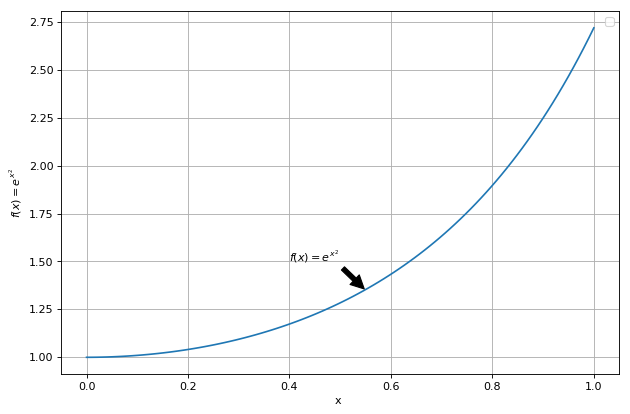

In [4]:
x = np.linspace(a,b,100) # 100 valores linealmente espaciados
y = funcion(x)           # calculamos los valores de f(x)
fig = plt.figure(figsize=(9, 6), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)

# Graficamos f(x) en [a, b]
plt.plot(x, y,)
plt.xlabel('x ')                        # label para el eje x
plt.ylabel('$f(x) = e^{x^2}$')          # label para el eje y
plt.annotate('$f(x) = e^{x^2}$', xy=(.55, 1.35), xytext=(0.4, 1.5),arrowprops=dict(facecolor='black', shrink=0.05),)
plt.grid(True)                          # muestra la malla de fondo
plt.legend()                            # muestra el label en la figura
plt.show()                              # muestra la gráfica

Ahora queremos ver cuál será el área bajo la gráfica (valor de la integral) que debemos calcular:

No handles with labels found to put in legend.


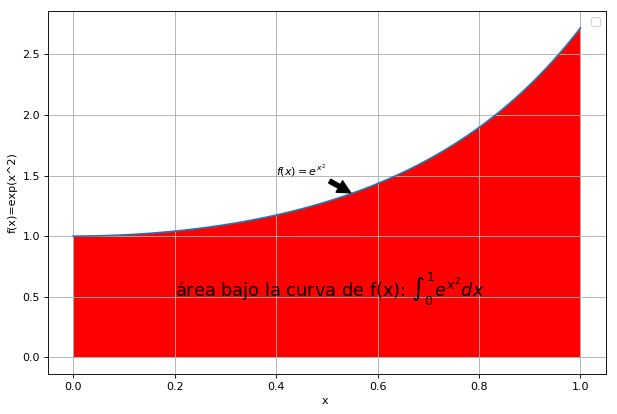

In [5]:
# Graficamos el área bajo la curva de f(x) (integral)
fig = plt.figure(figsize=(9, 6), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)

plt.plot(x, y)
plt.fill_between(x, y, where=y>0, facecolor='red')  # sombrea la parte de la gráfica debajo de la función f(x) en [a,b]
plt.annotate('$f(x) = e^{x^2}$', xy=(.55, 1.35), xytext=(0.4, 1.5),arrowprops=dict(facecolor='black', shrink=0.05),)
plt.text(0.2, 0.5, r'área bajo la curva de f(x): $\int_0^1 e^{x^2}dx$', fontsize=16)
plt.xlabel('x ')                        # label para el eje x
plt.ylabel('f(x)=exp(x^2)')             # label para el eje y
plt.grid(True)                          # muestra la malla de fondo
plt.legend()                            # muestra el label en la figura
plt.show()                              # muestra la gráfica

Esta integral no es trivial. Si empleamos las técnicas de integración vistas en los cursos de *Cálculo Integral*, obtendríamos una fórmula cerrada, que al evaluarla en los límites de integración dados, se encuentra la respuesta exacta (sin error) $\ldots$:

<div class="alert alert-block alert-warning">
$$\color{blue}{\int_0^1 e^{x^2}dx}=\color{green}{\frac{\sqrt{\pi}}{2}erfi(1)=1.46265 \ldots}$$
</div>

In [6]:
from sympy import *
init_printing(use_latex='mathjax')
x = symbols('x')

Escribimos la integral en forma simbólica para poderla calcular:

In [7]:
Integral(exp(x*x),(x,a,b))

1.0         
 ⌠          
 ⎮   ⎛ 2⎞   
 ⎮   ⎝x ⎠   
 ⎮  ℯ     dx
 ⌡          
0.0         

Evaluamos la integral en forma simbólica y obtenemos la fórmula cerrada con el valor exacto de la integral (sin error)

In [8]:
integrate(exp(x*x),x)

√π⋅erfi(x)
──────────
    2     

Evaluamos la función [error imaginaria](https://en.wikipedia.org/wiki/Error_function)

In [9]:
from sympy import *
from mpmath import *
mp.dps = 15; mp.pretty = True
init_printing(use_latex='mathjax')
x = symbols('x')

In [10]:
exacta = np.sqrt(np.pi)*erfi(1)/2
print('El valor exacto (sin error) de la integral es: ', exacta)

El valor exacto (sin error) de la integral es:  1.46265174590718


$\ldots$ pero como aquí estamos es en *Métodos Numéricos*, lo que realmente tenemos es la aproximación de la función $f(x)$ mediante un **_polinomio interpolante_** de orden $n$: $f(x)\approx P_n(x)$, como los vistos en el capítulo anterior (*Newton*, *Lagrange*, $\ldots$)

## Regla del Trapecio

#### Aplicación Simple

<div class="alert alert-block alert-warning">
$$\color{blue}{\int_{a}^{b}f(x)dx} \approx \color{green}{\int_a^b \left[ f(a) + \frac{f(b)-f(a)}{b-a}(x-a)\right]dx}
= \color{green}{(b-a)\frac{f(a)+f(b)}{2}}\color{red}{-\frac{(b-a)^3}{12}f''(\xi)}$$
</div>

#### Aplicación Múltiple

<div class="alert alert-block alert-warning">
$$\color{blue}{\int_{a}^{b}f(x)dx} \approx \color{green}{(b-a)\frac{f(x_0)+2\sum \limits_{i=1}^{n-1}f(x_i) +f(x_n)}{2n}}\color{red}{-\frac{(b-a)^3}{12n^3}f''(\xi)}$$
</div>

## Regla de Simpson 1/3

Método de integración numérica en honor al matemático *Thomas Simpson*, utilizado para obtener la aproximación de la integral empleando una interpolación polinomial de segundo orden sustituyendo a $f(x)$:

<div class="alert alert-block alert-warning">
$$\color{blue}{\int_{a}^{b}f(x)dx} \approx \color{green}{\frac{h}{3} \left[ f(x_0)+4f(x_1)+f(x_2)\right]}$$
</div>

<div class="alert alert-block alert-warning">
$$\color{blue}{\int_{a}^{b}f(x)dx} = \color{green}{\frac{h}{3}\left[f(x_0)+4f(x_1)+f(x_2)\right]}\color{red}{-\frac{h^5}{90}f^{(4)}(\xi)}$$
</div>

con:

$h=\frac{(b-a)}{2}$

$x_{i+1} = x_i + h$

A continuación, vamos a comparar graficamente las funciones "exacta" (con muchos puntos) y una aproximada empleando alguna técnica de interpolación para $n=3$ puntos (Polinomio interpolante de orden $2$).

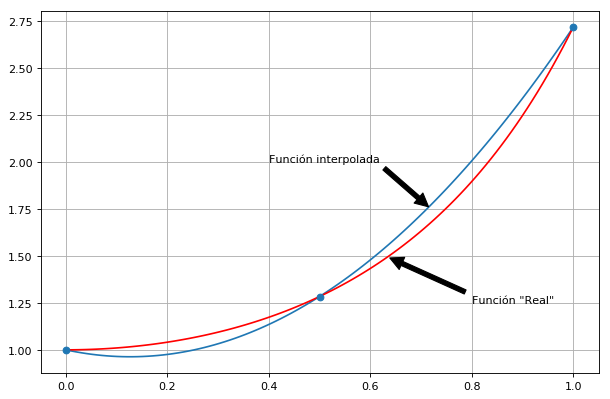

In [11]:
# usaremos uno de los tantos métodos de interpolación dispobibles en las bibliotecas de Python

n = 3                                  # puntos a interpolar para un polinomio de grado 2

xp = np.linspace(a,b,n)                # generación de n puntos igualmente espaciados para la interpolación
fp = funcion(xp)                       # evaluación de la función en los n puntos generados
x = np.linspace(a, b, 100)             # generación de 100 puntos igualmente espaciados
y = barycentric_interpolate(xp, fp, x) # interpolación numérica empleando el método del Baricentro

fig = plt.figure(figsize=(9, 6), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)

l, = plt.plot(x, y)
plt.plot(x, funcion(x), '-', c='red')
plt.plot(xp, fp, 'o', c=l.get_color())
plt.annotate('Función "Real"', xy=(.63, 1.5), xytext=(0.8, 1.25),arrowprops=dict(facecolor='black', shrink=0.05),)
plt.annotate('Función interpolada', xy=(.72, 1.75), xytext=(0.4, 2),arrowprops=dict(facecolor='black', shrink=0.05),)
plt.grid(True)                          # muestra la malla de fondo
plt.show()                              # muestra la gráfica

Se observa que hay una gran diferencia entre las áreas que se estarían abarcando en la función llamada "*real*" (que se emplearon $100$ puntos para su generación) y la función *interpolada* (con únicamente $3$ puntos para su generación) que será la empleada en la integración numérica (aproximada) mediante la regla de *Simpson $1/3$*.

Conscientes de esto, procederemos entonces a realizar el cálculo del área bajo la curva del $p_3(x)$ empleando el método de *Simpson $1/3$*

Creemos un programa en *Python* para que nos sirva para cualquier función $f(x)$ que queramos integrar en cualquier intervalo $[a,b]$ empleando la regla de integración de *Simpson $1/3$*:

In [ ]:
# se ingresan los valores del intervalo [a,b]
a = float(input('Ingrese el valor del límite inferior: '))
b = float(input('Ingrese el valor del límite superior: '))

In [12]:
# cuerpo del programa por la regla de Simpson 1/3
h = (b-a)/2   # cálculo del valor de h

x0 = a        # valor del primer punto para la fórmula de S1/3 
x1 = x0 + h   # Valor del punto intermedio en la fórmula de S1/3
x2 = b        # valor del tercer punto para la fórmula de S1/3 

fx0 = funcion(x0)   # evaluación de la función en el punto x0
fx1 = funcion(x1)   # evaluación de la función en el punto x1
fx2 = funcion(x2)   # evaluación de la función en el punto x2

int_S13 = h / 3 * (fx0 + 4*fx1 + fx2)

erel = np.abs(exacta - int_S13) / exacta * 100

print('el valor aproximado de la integral por la regla de Simpson1/3 es: ', int_S13, '\n')
print('el error relativo entre el valor real y el calculado es: ', erel,'%')

el valor aproximado de la integral por la regla de Simpson1/3 es:  1.4757305825350016 

el error relativo entre el valor real y el calculado es:  0.894186648627569 %


> El problema de calcular el error de esta forma es que realmente no conocemos el valor exacto (si lo conociéramos no necesitaríamos calcular un valor aproximado mediante una técnica numérica, no?)

Para poder calcular el error al usar la regla de *Simpson 1/3*:

<div class="alert alert-block alert-warning">
$$\color{red}{-\frac{h^5}{90}f^{(4)}(\xi)}$$
</div>

será necesario derivar cuatro veces la función original: $f(x)=e^{x^2}$. Para esto, vamos a usar nuevamente el cálculo simbólico (siempre deben verificar que la respuesta obtenida es la correcta!!!):

In [13]:
from sympy import *
x = symbols('x')

Derivamos cuatro veces la función $f(x)$ con respecto a $x$:

In [14]:
deriv4 = diff(exp(x*x),x,4)
deriv4

                      ⎛ 2⎞
  ⎛   4       2    ⎞  ⎝x ⎠
4⋅⎝4⋅x  + 12⋅x  + 3⎠⋅ℯ    

y evaluamos esta función de la cuarta derivada en un punto $0 \leq \xi \leq 1$. 

> Como la función $f{^{(4)}}(x)=4(4x{^4}+12x{^2}+3)e{^{x{^2}}}$ es creciente en el intervalo $[0,1]$ (compruébelo gráficamente y/o por las técnicas vistas en cálculo diferencial), entonces, el valor que hace máxima la cuarta derivada en el intervalo dado es:

In [15]:
evald4 = deriv4.evalf(subs={x: 1.0})
print('El valor de la cuarta derivada de f es: ',evald4)

El valor de la cuarta derivada de f es:  206.589418962887


Calculamos el error en la regla de *Simpson $1/3$*

In [16]:
errorS13 = h**5*evald4/90
print('El error al usar la regla de Simpson 1/3  es: ', errorS13)

El error al usar la regla de Simpson 1/3  es:  0.0717324371398915


Entonces, podemos expresar el valor de la integral de la función $f(x)=e^{x^2}$ en el intervalo $[0,1]$ usando la *Regla de Simpson $1/3$* como:

<div class="alert alert-block alert-warning">
$$\color{blue}{\int_0^1e^{x^2}dx} = \color{green}{1,475730} \color{red}{- 0.071732}$$
</div>

Si lo fuéramos a hacer "a mano" $\ldots$ aplicando la fórmula directamente, con los siguientes datos:

$h = \frac{(1.0 - 0.0)}{2.0} = 0.5$

$x_0 = 0.0$

$x_1 = 0.5$

$x_2 = 1.0$

$f(x) = e^{x^2}$

sustituyendo estos valores en la fórmula dada:


$\int_0^1e^{x^2}dx \approx \frac{0.5}{3} \left[f(0)+4f(0.5)+f(1)\right]$

$\int_0^1e^{x^2}dx \approx \frac{0.5}{3} \left[ e^{(0)^2} + 4e^{(0.5)^2} + e^{(1)^2} \right] \approx 1.4757$

## Regla de Simpson 3/8

Resulta cuando se sustituye la función $f(x)$ por una interpolación de tercer orden:

<div class="alert alert-block alert-warning">
$$\color{blue}{\int_{a}^{b}f(x)dx} = \color{green}{\frac{3h}{8}\left[f(x_0)+3f(x_1)+3f(x_2)+f(x_3)\right]}\color{red}{-\frac{3h{^5}}{80}f{^{(4)}}(\xi)}$$
</div>

Realizando un procedimiento similar al usado para la regla de *Simpson $1/3$*, pero esta vez empleando $n=4$ puntos:

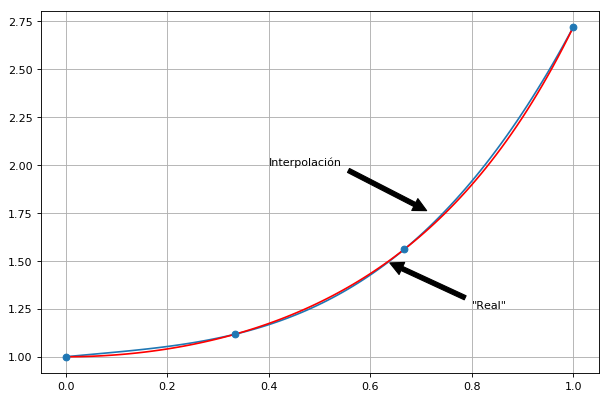

In [17]:
# usaremos uno de los tantos métodos de interpolación dispobibles en las bibliotecas de Python

n = 4                                  # puntos a interpolar para un polinomio de grado 2

xp = np.linspace(0,1,n)                # generación de n puntos igualmente espaciados para la interpolación
fp = funcion(xp)                       # evaluación de la función en los n puntos generados
x = np.linspace(0, 1, 100)             # generación de 100 puntos igualmente espaciados
y = barycentric_interpolate(xp, fp, x) # interpolación numérica empleando el método del Baricentro

fig = plt.figure(figsize=(9, 6), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)

l, = plt.plot(x, y)
plt.plot(x, funcion(x), '-', c='red')
plt.plot(xp, fp, 'o', c=l.get_color())
plt.annotate('"Real"', xy=(.63, 1.5), xytext=(0.8, 1.25),arrowprops=dict(facecolor='black', shrink=0.05),)
plt.annotate('Interpolación', xy=(.72, 1.75), xytext=(0.4, 2),arrowprops=dict(facecolor='black', shrink=0.05),)
plt.grid(True)                          # muestra la malla de fondo
plt.show()                              # muestra la gráfica

In [18]:
# cuerpo del programa por la regla de Simpson 3/8
h = (b - a) / 3   # cálculo del valor de h

int_S38 = 3 * h / 8 * (funcion(a) + 3*funcion(a + h) + 3*funcion(a + 2*h) + funcion(a + 3*h))

erel = np.abs(exacta - int_S38) / exacta * 100

print('el valor aproximado de la integral utilizando la regla de Simpson 3/8 es: ', int_S38, '\n')
print('el error relativo entre el valor real y el calculado es: ', erel,'%')

el valor aproximado de la integral utilizando la regla de Simpson 3/8 es:  1.4687136909381222 

el error relativo entre el valor real y el calculado es:  0.414448965579356 %


Para poder calcular el error al usar la regla de *Simpson 3/8*:

<div class="alert alert-block alert-warning">
$$\color{red}{-\frac{3h^5}{80}f^{(4)}(\xi)}$$
</div>

será necesario derivar cuatro veces la función original: $f(x)=e^{x^2}$. Para esto, vamos a usar nuevamente el cálculo simbólico (siempre deben verificar que la respuesta obtenida es la correcta!!!):

In [19]:
errorS38 = 3*h**5*evald4/80
print('El error al usar la regla de Simpson 3/8 es: ',errorS38)

El error al usar la regla de Simpson 3/8 es:  0.0318810831732851


Entonces, podemos expresar el valor de la integral de la función $f(x)=e^{x^2}$ en el intervalo $[0,1]$ usando la *Regla de Simpson $3/8$* como:

<div class="alert alert-block alert-warning">
$$\color{blue}{\int_0^1e^{x^2}dx} = \color{green}{1,468714} \color{red}{- 0.031881}$$
</div>

Aplicando la fórmula directamente, con los siguientes datos:

$h = \frac{(1.0 - 0.0)}{3.0} = 0.33$

$x_0 = 0.0$

$x_1 = 0.33$

$x_2 = 0.66$

$x_3 = 1.00$

$f(x) = e^{x^2}$

sustituyendo estos valores en la fórmula dada:


$\int_0^1e^{x^2}dx \approx \frac{3*0.33}{8} \left[f(0)+3f(0.33)+3f(0.66)+f(1.0)\right]$

$\int_0^1e^{x^2}dx \approx \frac{3*0.33}{8} \left[ e^{(0)^2} + 3e^{(0.33)^2} + 3e^{(0.66)^2}+ e^{(1.0)^2} \right] \approx 1.468713 \ldots$

Esta sería la respuesta si solo nos conformamos con lo que podemos hacer usando word...

## Método de Romberg

El Método de Romberg hace uso de la siguiente ecuación de recurrencia:

<div class="alert alert-block alert-warning">
$$\color{blue}{T_0^k=\frac {h}{2^k} \left( \frac{1}{2}f_0+ f_1 + \ldots + f_{2^{k-1}}+\frac{1}{2}f_2^{k} \right)}$$

con:

$h = b-a$

$f_i = f(x_i)$

Ahora, para la integral que hemos estado trabajando a lo largo del ejemplo:

$$\int_0^1 e^{x^2}dx$$

con $h=1.0-0.0=1.0$

$T_0^0= \frac{1.0}{2^0} \left( \frac{1}{2}e^{(0)^2} + \frac{1}{2}e^{(1)^2} \right) = 1.85914091$

$T_0^1= \frac{1.0}{2^1} \left( \frac{1}{2}e^{(0)^2} + e^{(0.5)^2} + \frac{1}{2}e^{(1)^2} \right) = 1.47573058$

$T_0^2= \frac{1.0}{2^2} \left( \frac{1}{2}e^{(0)^2} + e^{(0.25)^2}+ e^{(0.50)^2} + e^{(0.75)^2} +  \frac{1}{2}e^{(1)^2} \right) = 1.46290944$

$T_0^3= \frac{1.0}{2^3} \left( \frac{1}{2}e^{(0)^2} + e^{(0.125)^2}+ e^{(0.250)^2} + e^{(0.375)^2} + e^{(0.50)^2} + e^{(0.625)^2}+ e^{(0.75)^2} + \frac{1}{2}e^{(1)^2} \right) = 1.46265359$



$\color{blue}{\vdots}$

Realizando un programa en *Python*

In [20]:
def print_row(lst):
    print(' '.join('%11.8f' % x for x in lst))

def romberg(f, a, b, eps = 1E-8):
    """Approximate the definite integral of f from a to b by Romberg's method.
    eps is the desired accuracy."""
    R = [[0.5 * (b - a) * (f(a) + f(b))]]  # R[0][0]
    print_row(R[0])
    n = 1
    while True:
        h = float(b-a)/2**n
        R.append((n+1)*[None])  # Add an empty row.
        R[n][0] = 0.5*R[n-1][0] + h*sum(f(a+(2*k-1)*h) for k in range(1, 2**(n-1)+1)) # for proper limits
        for m in range(1, n+1):
            R[n][m] = R[n][m-1] + (R[n][m-1] - R[n-1][m-1]) / (4**m - 1)
        print_row(R[n])
        if abs(R[n][n-1] - R[n][n]) < eps:
            return R[n][n]
        n += 1

from math import *

# In this example, the error function erf(1) is evaluated.
print(romberg(lambda x: exp(x*x), 0, 1))

 1.85914091
 1.57158317  1.47573058
 1.49067886  1.46371076  1.46290944
 1.46971228  1.46272341  1.46265759  1.46265359
 1.46442031  1.46265632  1.46265185  1.46265176  1.46265175
1.4626517501404772
